In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

# Number of Transactions

In [2]:
dataNum = open("numtransactions.txt", "r")

dataNum = json.load(dataNum) 

dataNum = pd.DataFrame(dataNum, columns = ['Month-Year', 'num'])

dataNum['Month-Year'] = pd.to_datetime(dataNum['Month-Year'], format = '%m-%y')

dataNum = dataNum.sort_values(by = 'Month-Year')

dataNum['Month-Year'] = dataNum['Month-Year'].dt.to_period('M')



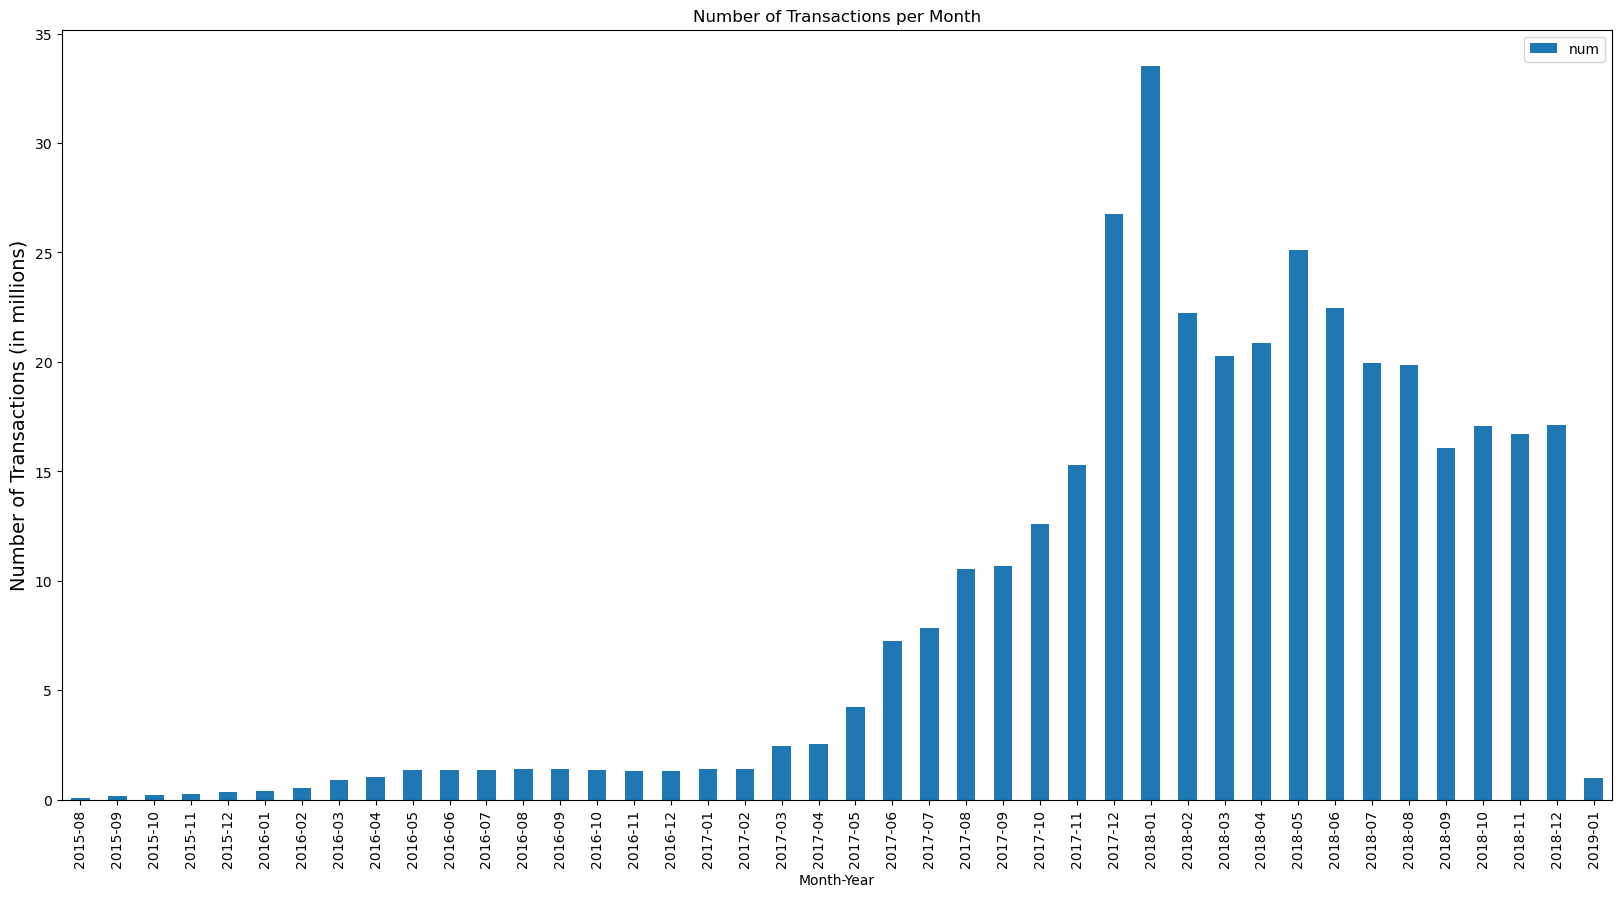

In [3]:
# plot stacked bar chart

dataNum.plot(x = 'Month-Year', y = 'num', kind = 'bar', stacked = True, figsize = (20, 10))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))

plt.title('Number of Transactions per Month')

plt.xlabel('Month-Year')

plt.ylabel('Number of Transactions (in millions)', fontsize=14)

# save plot

plt.savefig('numtransactions.png')

plt.show()

# Average Transactions

In [4]:
dataAVG = open("averagetransactions.txt", "r")

dataAVG = json.load(dataAVG)

df = pd.DataFrame(dataAVG, columns = ['Month-Year', 'Average_Transactions_Value'])

df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%m-%y')

df = df.sort_values(by=['Month-Year'])

# remove days from date
df['Month-Year'] = df['Month-Year'].dt.to_period('M')


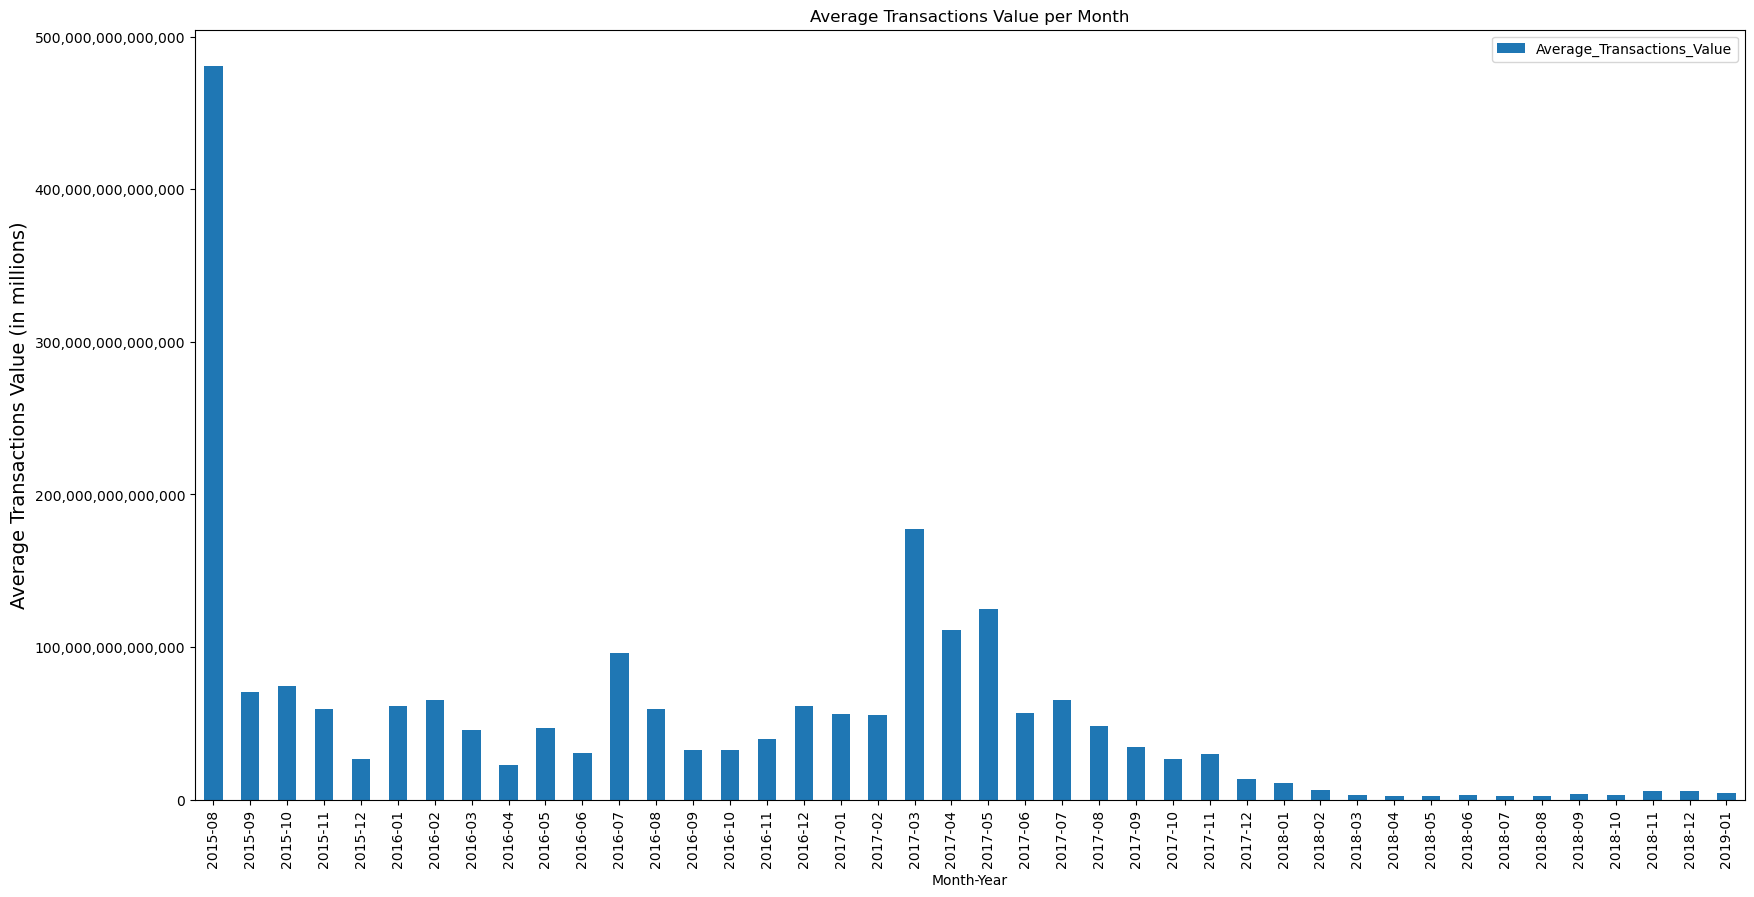

In [5]:
# plot stacked bar chart

df.plot(x = 'Month-Year', y = 'Average_Transactions_Value', kind = 'bar', stacked = True, figsize = (20, 10))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))

plt.title('Average Transactions Value per Month')

plt.xlabel('Month-Year')

plt.ylabel('Average Transactions Value (in millions)', fontsize=14)

# save plot

plt.savefig('averagetransactions.png')

plt.show()

# Gas Price over time

In [6]:
gasprice = open("gasprice.txt", "r")

gasprice = json.load(gasprice)

df = pd.DataFrame(gasprice, columns = ['Month-Year', 'Gas_Price'])

df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%m-%y')

df = df.sort_values(by=['Month-Year'])

# remove days from date
df['Month-Year'] = df['Month-Year'].dt.to_period('M')

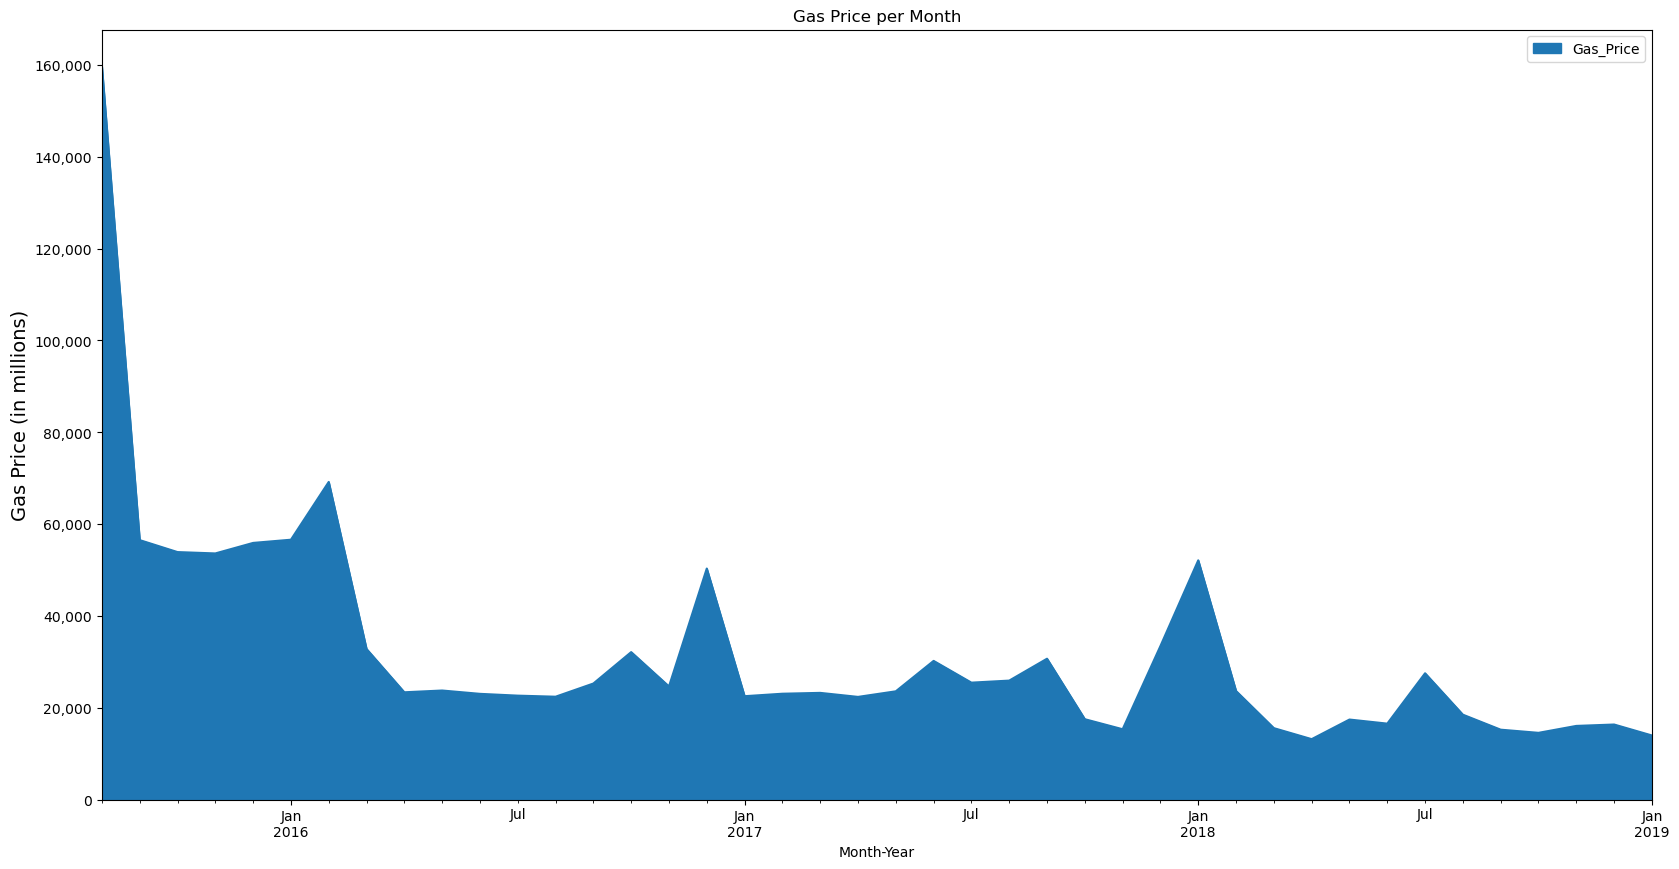

In [7]:
# create area plot

df.plot(x = 'Month-Year', y = 'Gas_Price', kind = 'area', stacked = True, figsize = (20, 10))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))

plt.title('Gas Price per Month')

plt.xlabel('Month-Year')

plt.ylabel('Gas Price (in millions)', fontsize=14)

# save plot

plt.savefig('gasprice.png')

plt.show()


# Gas Used over time

In [8]:
gasusage = open("gasused.txt", "r")

gasusage = json.load(gasusage)

df = pd.DataFrame(gasusage, columns = ['Month-Year', 'Gas_Usage'])

df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%m-%y')

df = df.sort_values(by=['Month-Year'])

# gasusage to int

df['Gas_Usage'] = df['Gas_Usage'].astype(int)

# remove days from date

df['Month-Year'] = df['Month-Year'].dt.to_period('M')

df

,Month-Year,Gas_Usage
1,2015-08,356364
26,2015-09,821011
33,2015-10,1094350
28,2015-11,808819
32,2015-12,421430
14,2016-01,306853
8,2016-02,421546
2,2016-03,261626
15,2016-04,233613
41,2016-05,278264


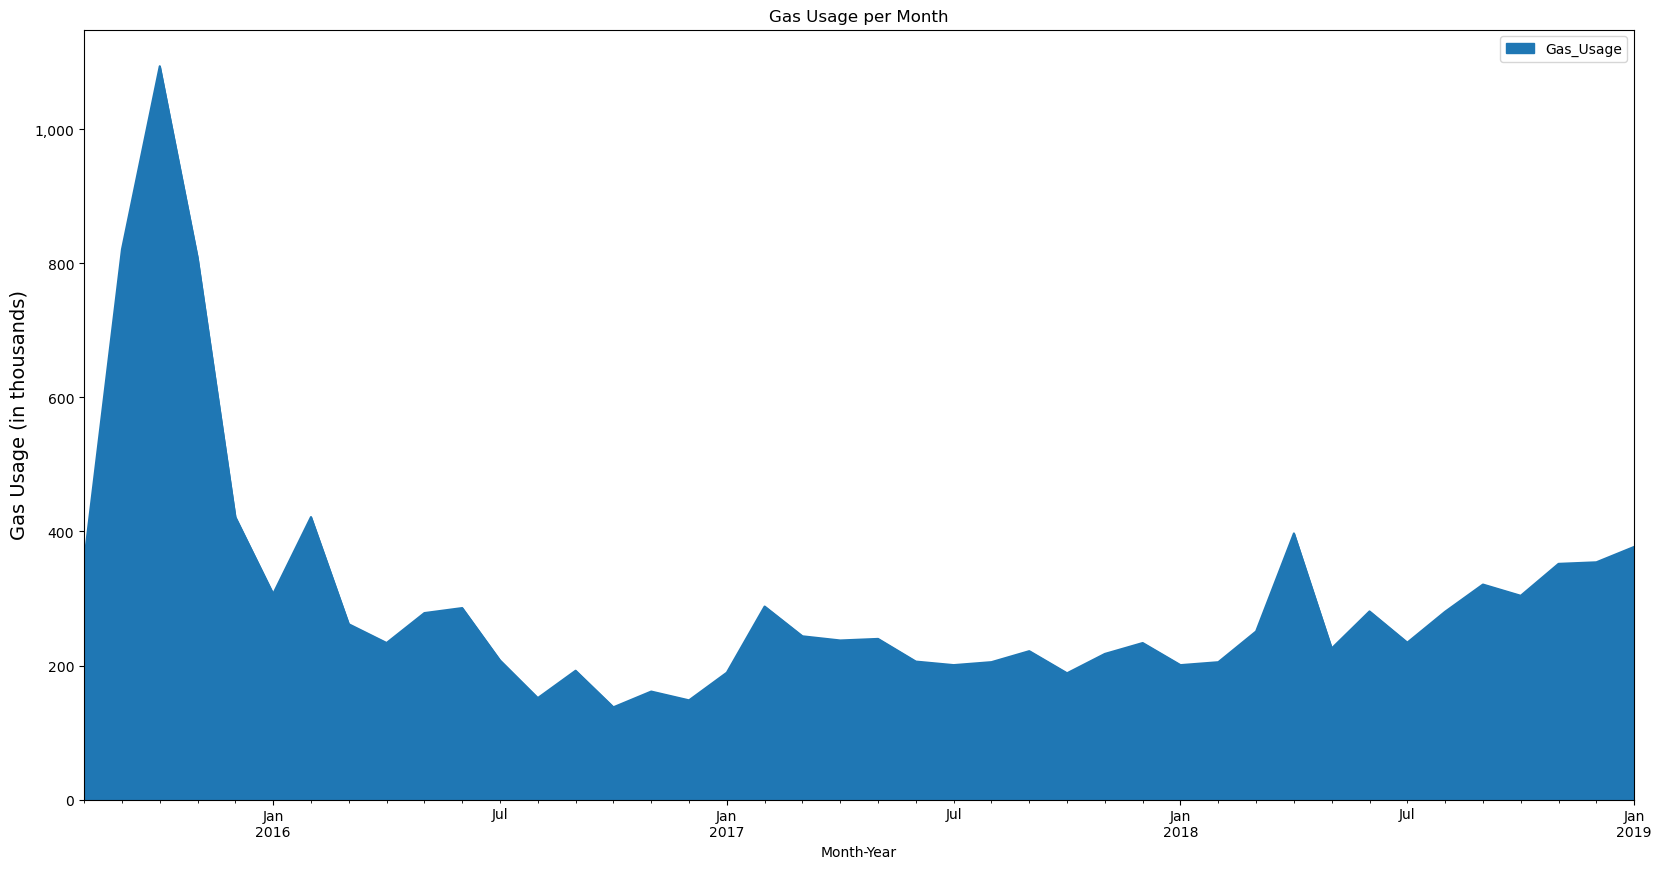

In [9]:
# plot area chart

df.plot(x = 'Month-Year', y = 'Gas_Usage', kind = 'area', stacked = True, figsize = (20, 10))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000))))

plt.title('Gas Usage per Month')

plt.xlabel('Month-Year')

plt.ylabel('Gas Usage (in thousands)', fontsize=14)

# save plot

plt.savefig('gasusage.png')

plt.show()


# Top 10 Smart Contracts Gas Used

In [10]:
top10gas = open("top10gasused.txt", "r")

top10gas = json.load(top10gas)

df = pd.DataFrame(top10gas, columns = ['Address', 'Value', 'Gas Used', 'Month-Year'])

df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%m-%y')

df = df.sort_values(by=['Month-Year'])

# remove days from date

df['Month-Year'] = df['Month-Year'].dt.to_period('M')

df



,Address,Value,Gas Used,Month-Year
0,0xeca56d04546affcec0b3ce61971136f497866a3b,1.880000e+23,129244.0,2015-11
1,0x4b25b370aa62d408bc2c87598289b59d1140545f,1.244240e+23,129244.0,2015-11
2,0x46a9a148d617138cb5c0346de289c030856bb716,5.000000e+22,129244.0,2015-11
4,0xea51c9e6e5f7c6965955d24ad0900e7823256baa,4.000000e+22,129244.0,2015-11
5,0x63158d4a01d8367f142beb72689b9647a0ccae30,3.300000e+22,122423.0,2016-06
3,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,5.000000e+22,90000.0,2017-02
8,0x1fd2628ef2deaea8cd672f82668e218dd12bed3d,2.000000e+22,122967.0,2017-05
9,0x0b9da44cc9278e41d5d60811959c55512cce7b40,2.000000e+22,90000.0,2017-05
6,0xe3ecccd6c67da25871fc5ff9a32a6f5c379167a6,3.000000e+22,90000.0,2018-07
7,0xc1d5fb05195cf76ee514c826fea31fc82e0db0b3,2.000000e+22,23083.0,2018-10


# Scam Values over time

In [11]:
scamsovertime = open("scamsovertime.txt", "r")

scamsovertime = json.load(scamsovertime)

df = pd.DataFrame(scamsovertime, columns = ['Month-Year', 'Value'])

# separate the date and scam type

df['scam types'] = df['Month-Year'].str.split(':', expand=True)[1]

df['Month-Year'] = df['Month-Year'].str.split(':', expand=True)[0]

df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%m-%y')

df = df.sort_values(by=['Month-Year'])

# remove days from date

df['Month-Year'] = df['Month-Year'].dt.to_period('M')

# covert to numeric

df['Value'] = pd.to_numeric(df['Value'])

df

,Month-Year,Value,scam types
14,2017-05,9.000000e+16,Phishing
22,2017-06,1.826740e+20,Fake ICO
1,2017-06,9.878410e+18,Scamming
3,2017-06,1.000000e+18,Phishing
17,2017-07,1.060149e+22,Phishing
41,2017-07,2.452982e+21,Scamming
30,2017-07,1.624220e+19,Fake ICO
8,2017-08,3.016474e+19,Scamming
23,2017-08,1.417513e+22,Phishing
13,2017-08,1.811647e+20,Fake ICO


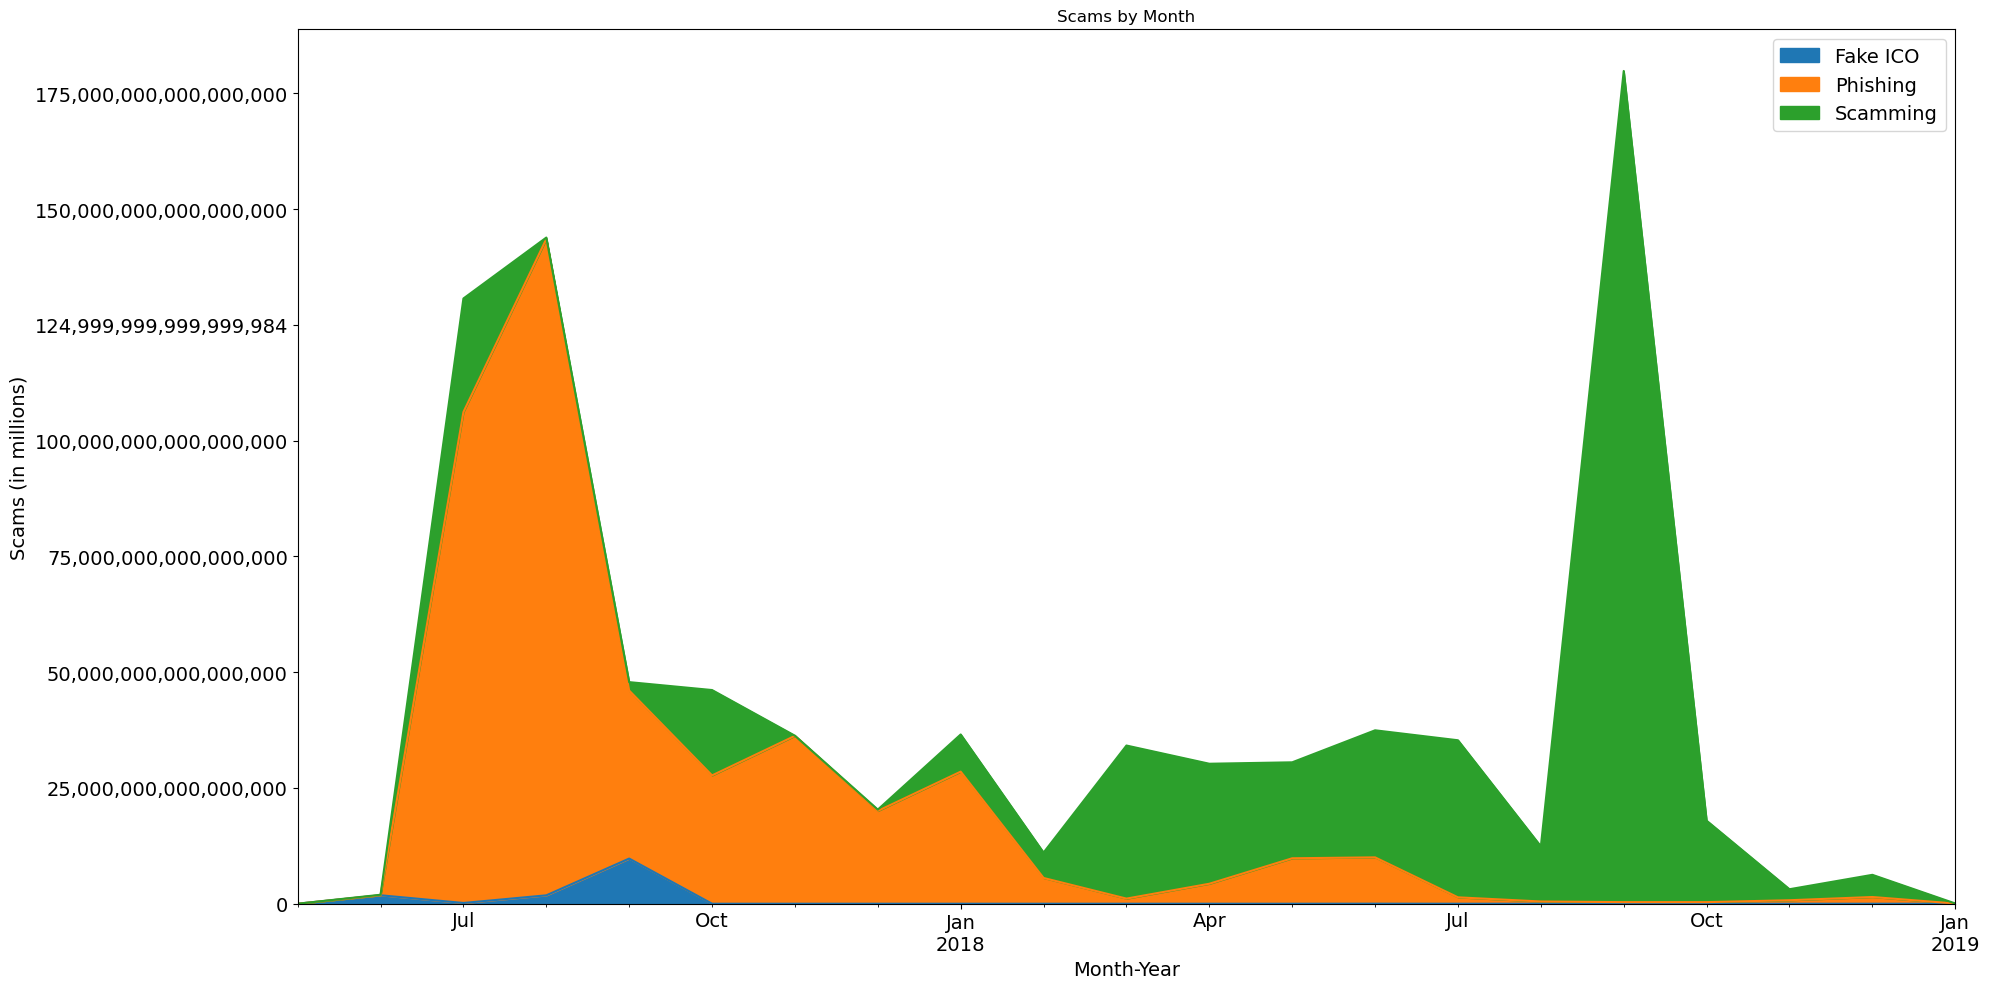

In [12]:
# plot area chart

df.pivot(index='Month-Year', columns='scam types', values='Value').plot.area(figsize=(20,10), title='Scams by Month', fontsize=14)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/100000))))

plt.xlabel('Month-Year', fontsize=14)

plt.ylabel('Scams (in millions)', fontsize=14)

# adjust size of legend

plt.legend(fontsize=14)

# tighten layout

plt.tight_layout()

# save plot

plt.savefig('scamsovertime.png')


plt.show()